# Imports

## Import gen

In [66]:
import pandas as pd
import numpy as np
import time
import os,sys
import pickle
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
from IPython.display import clear_output

## Import sklearn

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import fetch_openml

## Import Keras

In [68]:
from keras.utils.vis_utils import plot_model

In [69]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [70]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,SpatialDropout2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [71]:
from keras.callbacks import TensorBoard

## Import data

In [72]:
path_to_test = '../data/skin_cancer/test_dataset/'

In [73]:
path_to_train = '../data/skin_cancer/train_dataset/'

In [74]:
val = "test.npy"
x_test = np.load(path_to_test+'x_'+val)
y_test = np.load(path_to_test+'y_'+val)

In [75]:
val = "train.npy"
x_train = np.load(path_to_train+'x_'+val)
y_train = np.load(path_to_train+'y_'+val)

# Visualisation

In [76]:
def show_image(dataset,indice,ax=None):
    values = dataset[indice]
    if ax!=None:
        ax.imshow(values,cmap='binary')
        return None
    plt.imshow(values,cmap='binary')
    plt.axis('off')
    plt.show()

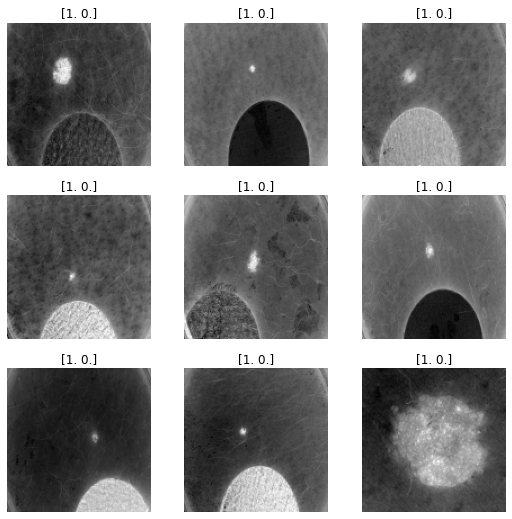

In [77]:
fig,axes = plt.subplots(3,3,figsize=(9,9))
axes_ = axes.flatten()
for i in range(len(axes_)):
    show_image(x_train,i,axes_[i])
    axes_[i].axis('off')
    axes_[i].set_title(y_train[i])
    
plt.show()

# Standardisation

In [78]:
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0

# Model Support functions

In [79]:
def plot_history(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']
    fig,ax = plt.subplots(figsize=(14,7))
    ax.plot(val_acc,label='validation accuracy')
    ax.plot(train_acc,label='training accuracy')
    ax.legend()
    ax.set_title('Accuracy in train and validation set')
    plt.show()

In [80]:
def compile_fit_evaluate_model(Name,model,
                               X=x_train,
                               y=y_train,
                               epochs=10,
                               batch_size=50,
                               validation_split=0.1,
                               optimizer ='adam'):
    log_dir = f'../models/skin_cancer_logs/{Name}'
    tensorboard = TensorBoard(log_dir=log_dir)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(x_train, 
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=validation_split,
                       callbacks=[tensorboard])
    print('--------------- Test Accuracy -------------------')
    _, test_acc = model.evaluate(x_test, y_test)
    print(test_acc)
    plot_history(history)
    return history,model

# Simple Model 

In [81]:
NAME = f'simple*128*64dense_{int(time.time())}'

In [82]:
NAME

'simple*128*64dense_1655415807'

In [83]:
simple_model = Sequential(
    [
        Flatten(),
        Dense(128,activation='relu'),
        Dense(24,activation='relu'),
        Dense(2,activation='softmax',name='output_layer'),
    ]
)

In [84]:
hist,simple_model = compile_fit_evaluate_model(NAME,simple_model,epochs=500)

2022-06-16 23:43:36.550080: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-06-16 23:43:36.550180: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-06-16 23:43:36.550343: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/500
11/36 [========>.....................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5096

2022-06-16 23:43:37.100428: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-06-16 23:43:37.100471: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-06-16 23:43:37.140795: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-06-16 23:43:37.142014: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-06-16 23:43:37.143480: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ../models/skin_cancer_logs/simple*128*64dense_1655415807/train/plugins/profile/2022_06_16_23_43_37
2022-06-16 23:43:37.144752: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ../models/skin_cancer_logs/simple*128*64dense_1655415807/train/plugins/profile/2022_06_16_23_43_37/raphael-ubuntu.trace.json.gz
2022-06-16 23:43:37.145873: I tensorflow/core/profiler/rpc/client/save_profile.

36/36 [==============================] - 1s 22ms/step - loss: 0.6914 - accuracy: 0.5225 - val_loss: 0.8553 - val_accuracy: 0.1200
Epoch 2/500
36/36 [==============================] - 1s 18ms/step - loss: 0.6808 - accuracy: 0.5522 - val_loss: 0.9442 - val_accuracy: 0.1200
Epoch 3/500
36/36 [==============================] - 1s 19ms/step - loss: 0.6801 - accuracy: 0.5658 - val_loss: 0.8695 - val_accuracy: 0.1700
Epoch 4/500
36/36 [==============================] - 1s 19ms/step - loss: 0.6713 - accuracy: 0.5732 - val_loss: 0.9283 - val_accuracy: 0.1850
Epoch 5/500
36/36 [==============================] - 1s 17ms/step - loss: 0.6696 - accuracy: 0.6010 - val_loss: 0.8690 - val_accuracy: 0.2900
Epoch 6/500
36/36 [==============================] - 1s 20ms/step - loss: 0.6608 - accuracy: 0.6219 - val_loss: 0.9929 - val_accuracy: 0.1900
Epoch 7/500
36/36 [==============================] - 1s 17ms/step - loss: 0.6585 - accuracy: 0.6088 - val_loss: 1.0730 - val_accuracy: 0.1400
Epoch 8/500
36/36 

KeyboardInterrupt: 

In [ ]:
plot_history(hist)

# Best CNN from digits

In [62]:
NAME = f'Best_cnn_+2dense_{int(time.time())}'

In [63]:
best_cnn = Sequential(
    [
        Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(128,128,1)),
        MaxPool2D(pool_size=2),
        Dropout(0.2),
        Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(128,128,1)),
        MaxPool2D(pool_size=2),
        Dropout(0.2),
        Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dropout(0.2),
        Dense(124,activation='relu'),
        Dense(64,activation='relu'),
        Dense(2,activation='softmax',name='outputlayer'),
    ]
)

In [64]:
best_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 32)        25632     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)       

In [65]:
hist,best_cnn = compile_fit_evaluate_model(NAME,best_cnn,epochs=500)

2022-06-16 23:40:43.803560: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-06-16 23:40:43.803652: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-06-16 23:40:43.803748: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/500
 1/36 [..............................] - ETA: 1:07 - loss: 0.6932 - accuracy: 0.4800

2022-06-16 23:40:45.918181: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-06-16 23:40:45.918241: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


 2/36 [>.............................] - ETA: 48s - loss: 0.6934 - accuracy: 0.4750 

2022-06-16 23:40:47.357172: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-06-16 23:40:47.358632: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-06-16 23:40:47.360135: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ../models/skin_cancer_logs/Best_cnn_+2dense_1655415641/train/plugins/profile/2022_06_16_23_40_47
2022-06-16 23:40:47.361101: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ../models/skin_cancer_logs/Best_cnn_+2dense_1655415641/train/plugins/profile/2022_06_16_23_40_47/raphael-ubuntu.trace.json.gz
2022-06-16 23:40:47.362600: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ../models/skin_cancer_logs/Best_cnn_+2dense_1655415641/train/plugins/profile/2022_06_16_23_40_47
2022-06-16 23:40:47.362709: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped to

36/36 [==============================] - 49s 1s/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.7360 - val_accuracy: 0.1100
Epoch 2/500
36/36 [==============================] - 48s 1s/step - loss: 0.6916 - accuracy: 0.5318 - val_loss: 0.7765 - val_accuracy: 0.1100
Epoch 3/500
14/36 [==========>...................] - ETA: 32s - loss: 0.6883 - accuracy: 0.5494

KeyboardInterrupt: 